In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

,Gap Current (A),Gap Voltage (V),Pulse On Time (µs),Pulse Off Time (µs),Material Removal Rate (mm³/min)
0,8,40,13,5,2.09
1,12,55,26,7,4.56
2,16,70,38,9,7.11
3,8,40,26,7,3.96
4,12,55,38,9,6.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gap Current (A)                  18 non-null     int64  
 1   Gap Voltage (V)                  18 non-null     int64  
 2   Pulse On Time (µs)               18 non-null     int64  
 3   Pulse Off Time (µs)              18 non-null     int64  
 4   Material Removal Rate (mm³/min)  18 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 852.0 bytes


None

MAE: 1.3143749999999965
MSE: 1.9179115524999921
RMSE: 1.3848868374347385
R2 Score: 0.6974697131409779


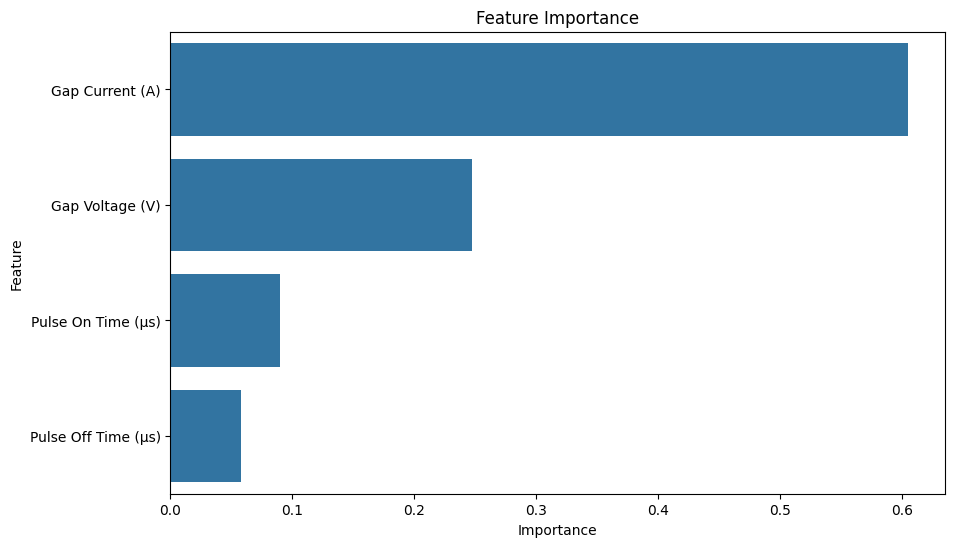

Predicted Material Removal Rate: 7.084700000000001


In [4]:
df = pd.read_csv('./EDM.csv')

# Display basic info
display(df.head())
display(df.info())

target = 'Material Removal Rate (mm³/min)'
features = [col for col in df.columns if col != target]

# Handle missing values
df.dropna(inplace=True)

# Splitting data into features and target
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Function to Predict Material Removal Rate
def predict_mrr():
    input_features = {}
    for feature in features:
        value = float(input(f"Enter value for {feature}: "))
        input_features[feature] = value
    
    input_df = pd.DataFrame([input_features], columns=features)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    print(f"Predicted Material Removal Rate: {prediction[0]}")

# Call function to get user input and predict MRR
predict_mrr()
